# Polynomial Regression

Polynomial Regression is a form of linear regression in which the relationship between the independent variable (X) and dependent variable (y) is modeled as an nth degree polynomial. Polynomial regression `fits a nonlinear relationship` between the value of (X) and the corresponding conditional mean of (y), denoted E(y|X), and has been used to describe nonlinear phenomena such as the growth rate of tissues, the distribution of carbon isotopes in lake sediments, and the progression of disease epidemics.

In [140]:
# import necessary liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [141]:
# Create Dummy Data
np.random.seed(42)
X = 2 - 3 * np.random.normal(0, 1, 20)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 20)

In [142]:
# Reshaping for the model
X = X[:, np.newaxis]
y = y[:, np.newaxis]

In [143]:
# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_linear_pred = linear_model.predict(X)

In [144]:
# Polynomial Transformation
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

In [145]:
# Train Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)

In [146]:
# Sorting X for smooth plotting
X_sorted = np.sort(X, axis=0)  # Sort X for plotting
X_poly_sorted = poly_features.transform(X_sorted)  # Transform sorted X for polynomial

# Predict sorted values for smooth curve
y_poly_pred_sorted = poly_model.predict(X_poly_sorted)
y_linear_pred_sorted = linear_model.predict(X_sorted)

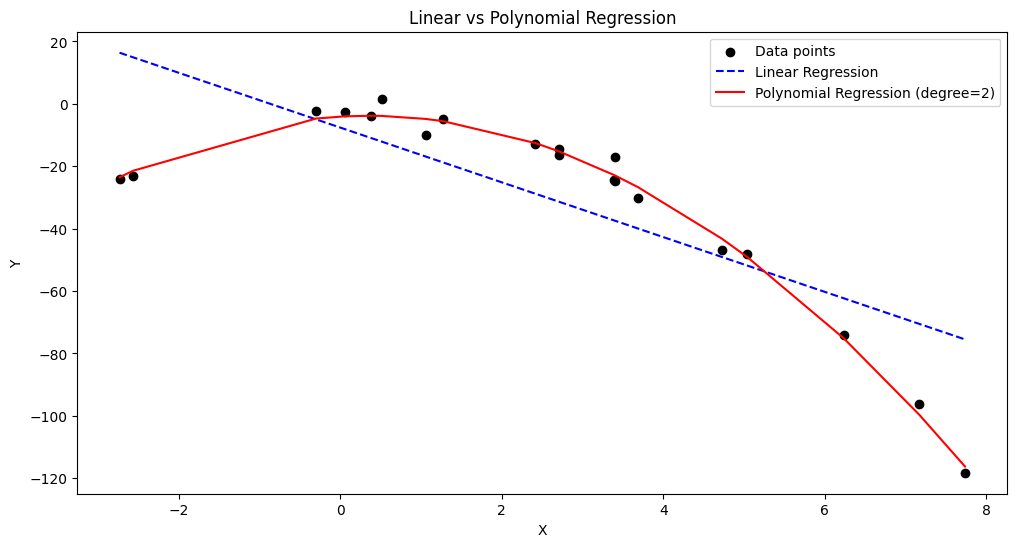

In [150]:
# Plot the results

plt.figure(figsize=(12, 6))

plt.scatter(X, y, color='black', label='Data points', alpha=1)
plt.plot(X_sorted, y_linear_pred_sorted, color='blue', linestyle='--', label='Linear Regression')
plt.plot(X_sorted, y_poly_pred_sorted, color='red', label=f'Polynomial Regression (degree={2})')
plt.title('Linear vs Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
